In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

DATA_DIR = '/Users/dhruv/Github/pipeline/data/numerai'
DATA_SET = '%s/%s'%(DATA_DIR, 'numerai_training_data.csv')

sns.set()

df = pd.read_csv(DATA_SET,  sep=',', header=0, index_col=False)
columns = list(df.columns.values)
print (columns)

['id', 'era', 'data_type', 'feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6', 'feature7', 'feature8', 'feature9', 'feature10', 'feature11', 'feature12', 'feature13', 'feature14', 'feature15', 'feature16', 'feature17', 'feature18', 'feature19', 'feature20', 'feature21', 'target']


In [14]:
import re
regex = r'feature'
features = [i for i, item in enumerate(columns) if re.search(regex, item)]
data = df.iloc[:,features[0]:features[-1]]

print (features)

[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


In [39]:
data.describe()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20
count,108405.000000,108405.00000,108405.000000,108405.000000,108405.000000,108405.000000,108405.000000,108405.000000,108405.000000,108405.000000,108405.000000,108405.000000,108405.000000,108405.000000,108405.000000,108405.000000,108405.000000,108405.000000,108405.000000,108405.000000
mean,0.500489,0.52870,0.593131,0.463543,0.430014,0.506619,0.525665,0.484669,0.348231,0.565529,0.416048,0.475409,0.426605,0.622671,0.546734,0.407971,0.568731,0.594192,0.525519,0.493394
std,0.090130,0.10490,0.098372,0.096387,0.087958,0.100884,0.096542,0.087952,0.101418,0.095981,0.097331,0.103580,0.092866,0.088380,0.091609,0.087795,0.092837,0.097566,0.089129,0.090487
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.013100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002520,0.000000,0.016500,0.002620,0.000000,0.000000,0.000000,0.021120
25%,0.455870,0.46791,0.540400,0.408910,0.376880,0.443410,0.471700,0.437220,0.282080,0.510540,0.362160,0.415570,0.378480,0.570380,0.493790,0.359280,0.522870,0.541190,0.472620,0.444070
50%,0.499290,0.53508,0.594830,0.466530,0.428840,0.508680,0.531030,0.483380,0.336690,0.571450,0.415290,0.477890,0.425220,0.626130,0.552750,0.406200,0.569970,0.595320,0.530720,0.488750
75%,0.546790,0.59569,0.648070,0.520500,0.482570,0.571790,0.579580,0.529180,0.402940,0.626150,0.469510,0.536430,0.473190,0.676210,0.604590,0.454230,0.616220,0.648000,0.578430,0.540270
max,1.000000,1.00000,0.994840,1.000000,1.000000,1.000000,0.984950,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.999890,1.000000,0.997570,1.000000,0.979030,0.968260


/Users/dhruv/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


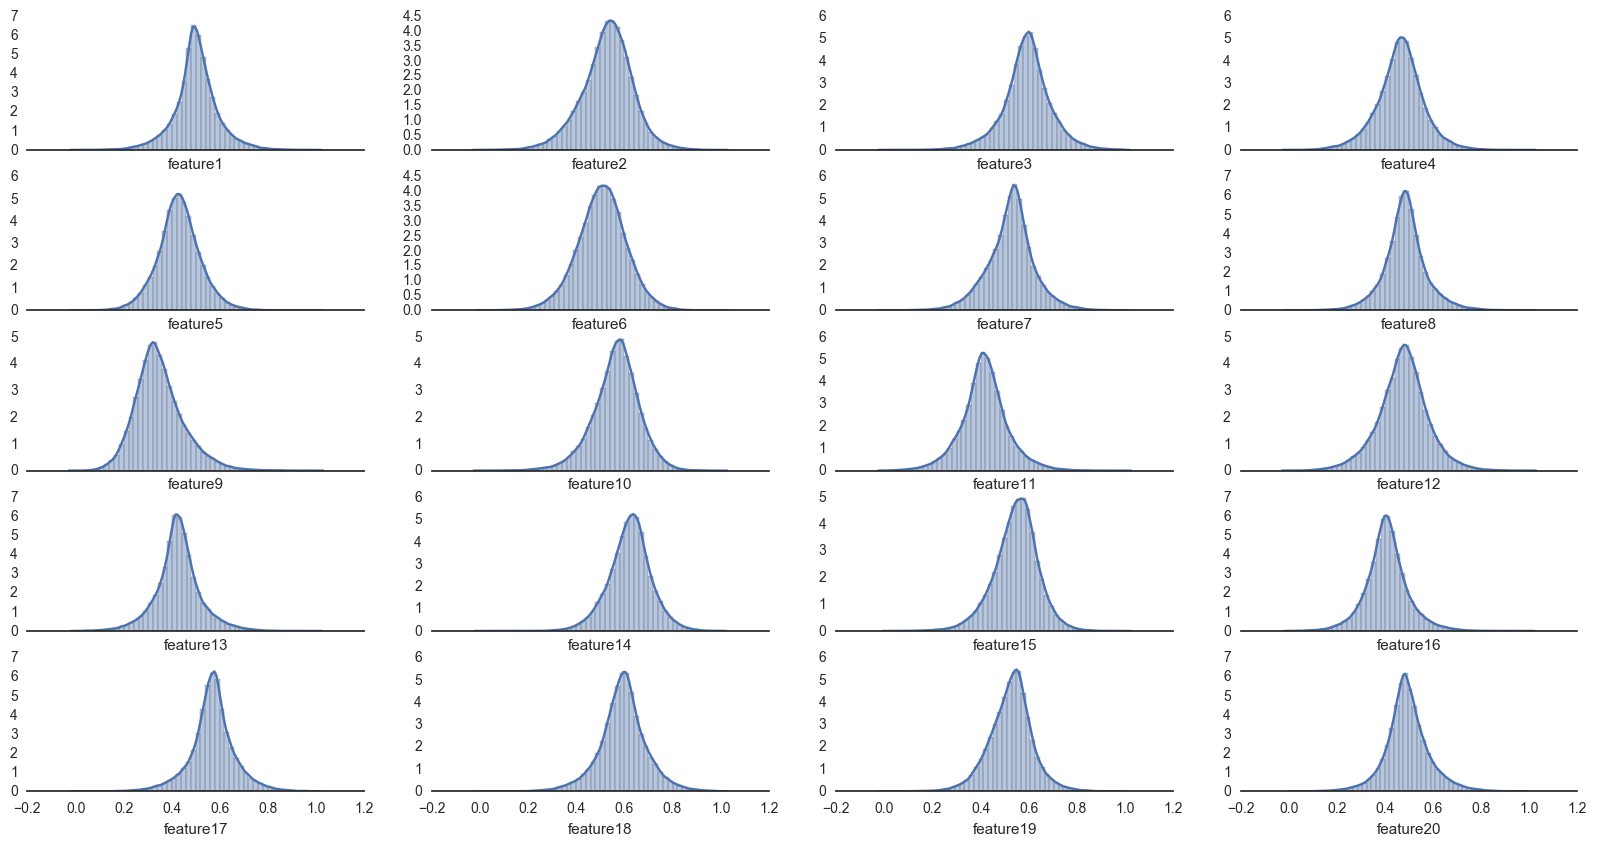

In [42]:
f, axes = plt.subplots(5, 4, figsize=(20, 10), sharex=True)
sns.despine(left=True)
sns.set(style="white")

_col = 0


def generate_feature(df):
    i = 0 
    while i < df.shape[1]:
        yield df.iloc[:,i]    
        i+=1

gen = generate_feature(data) 

for i in range(5):
    for j in range(4):
        sns.distplot(next(gen), ax=axes[i, j])
                  
plt.show()  


/Users/dhruv/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


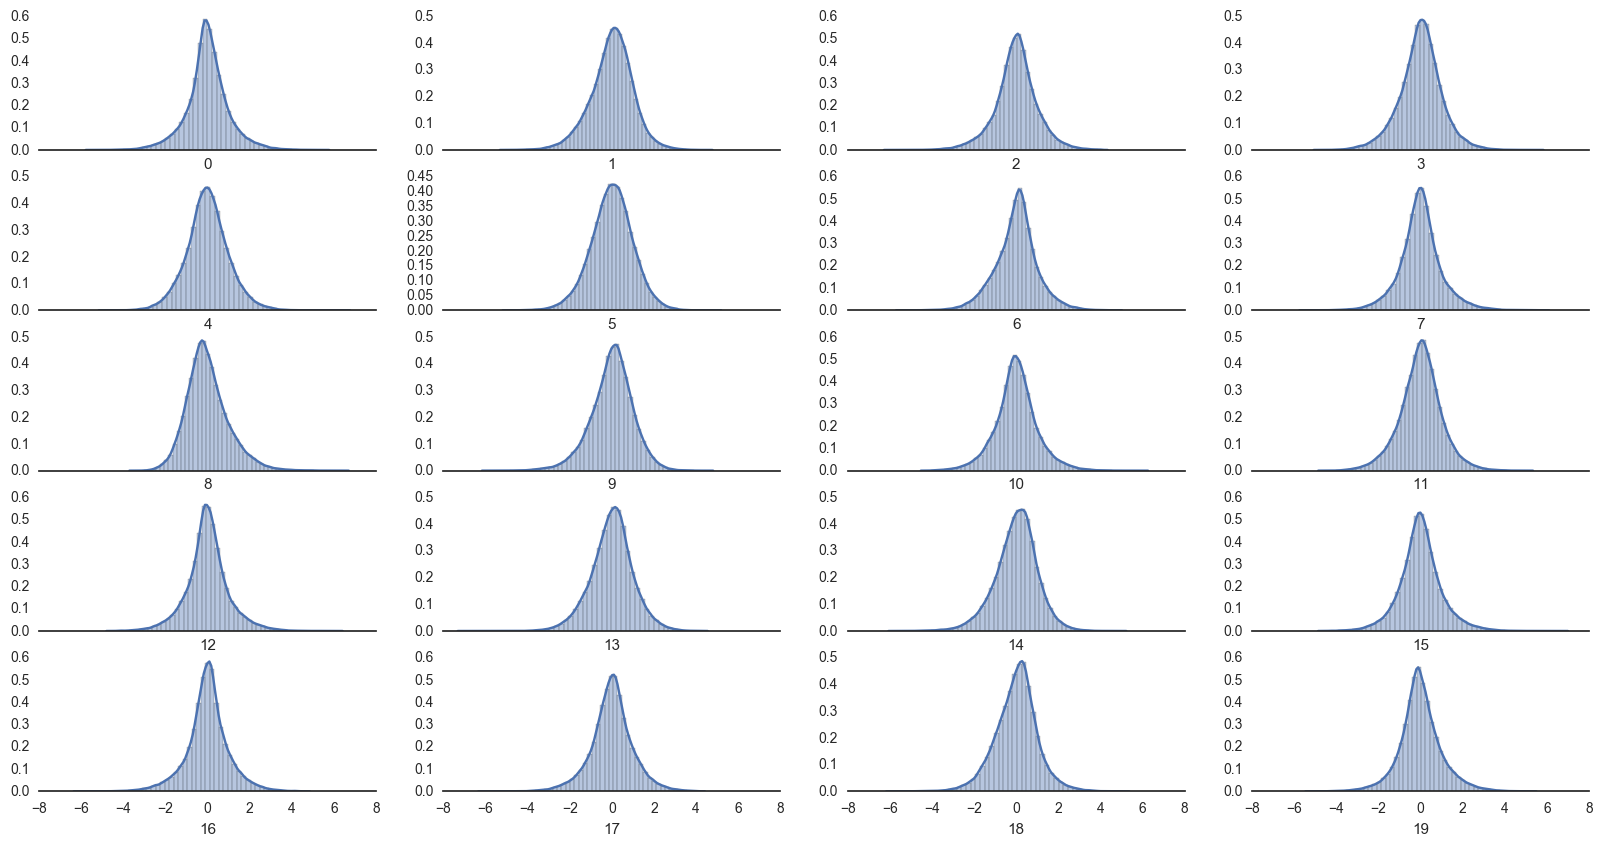

In [41]:
from sklearn import preprocessing

f, axes = plt.subplots(5, 4, figsize=(20, 10), sharex=True)
sns.despine(left=True)
sns.set(style="white")

X = preprocessing.StandardScaler().fit_transform(data)
X_df = pd.DataFrame(X)
gen = generate_feature(X_df)

for i in range(5):
    for j in range(4):
        sns.distplot(next(gen), ax=axes[i, j])

plt.show() 

In [40]:
X_df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,1.084050e+05,1.084050e+05,1.084050e+05,1.084050e+05,1.084050e+05,1.084050e+05,1.084050e+05,1.084050e+05,1.084050e+05,1.084050e+05,1.084050e+05,1.084050e+05,1.084050e+05,1.084050e+05,1.084050e+05,1.084050e+05,1.084050e+05,1.084050e+05,1.084050e+05,1.084050e+05
mean,-1.262354e-15,4.085402e-16,-1.709539e-16,-1.288038e-15,3.769824e-16,8.513026e-16,-4.574179e-16,9.967453e-17,-1.774257e-16,1.060133e-15,1.157144e-16,-2.216739e-16,-1.111207e-16,-1.675467e-15,-4.299724e-16,-5.863403e-16,2.599311e-16,7.228271e-16,-2.206574e-16,4.464417e-16
std,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00
min,-5.553025e+00,-5.040073e+00,-6.029491e+00,-4.809207e+00,-4.888900e+00,-4.891964e+00,-5.444980e+00,-5.510621e+00,-3.433647e+00,-5.892141e+00,-4.274590e+00,-4.589796e+00,-4.566662e+00,-7.045446e+00,-5.788008e+00,-4.617038e+00,-6.126163e+00,-6.090155e+00,-5.896166e+00,-5.219261e+00
25%,-4.950594e-01,-5.795115e-01,-5.360426e-01,-5.668143e-01,-6.040878e-01,-6.265579e-01,-5.589865e-01,-5.394885e-01,-6.522637e-01,-5.729162e-01,-5.536582e-01,-5.777075e-01,-5.182205e-01,-5.916712e-01,-5.779324e-01,-5.546028e-01,-4.939956e-01,-5.432411e-01,-5.935089e-01,-5.450971e-01
50%,-1.330614e-02,6.081663e-02,1.726681e-02,3.098639e-02,-1.334585e-02,2.042468e-02,5.556931e-02,-1.465559e-02,-1.137947e-01,6.169421e-02,-7.785972e-03,2.395609e-02,-1.491124e-02,3.913274e-02,6.567227e-02,-2.017374e-02,1.334868e-02,1.156309e-02,5.835589e-02,-5.132325e-02
75%,5.137155e-01,6.386086e-01,5.584792e-01,5.909187e-01,5.975195e-01,6.459964e-01,5.584630e-01,5.060842e-01,5.394477e-01,6.316038e-01,5.492852e-01,5.891260e-01,5.016430e-01,6.057813e-01,6.315553e-01,5.268984e-01,5.115370e-01,5.515055e-01,5.936480e-01,5.180417e-01
max,5.542168e+00,4.492875e+00,4.083578e+00,5.565674e+00,6.480268e+00,4.890586e+00,4.757393e+00,5.859244e+00,6.426616e+00,4.526680e+00,5.999685e+00,5.064627e+00,6.174479e+00,4.269423e+00,4.946632e+00,6.743338e+00,4.619302e+00,4.159321e+00,5.088262e+00,5.247904e+00


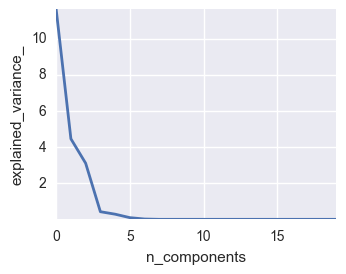

In [27]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X)

plt.figure(1, figsize=(4, 3))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')

plt.show()

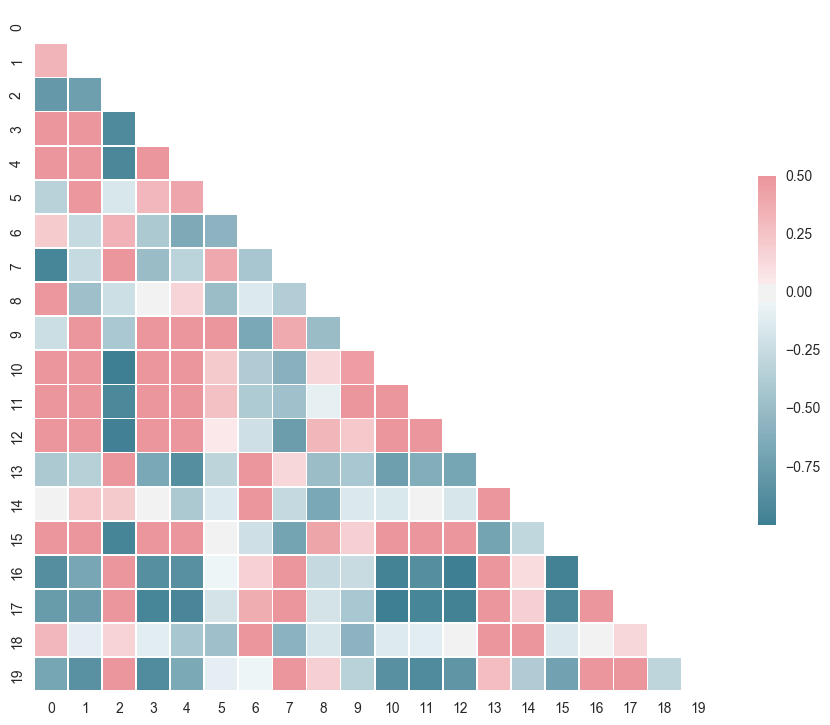

In [38]:
import numpy as np

# Correlation Matrix
sns.set(style="white")
corr = X_df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.5, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [ ]:
sns.set(style="white")

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))